In [1]:
import warnings
from importlib import reload
from functools import partial, lru_cache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm, trange
from joblib import delayed
from modAL import batch
from art.metrics import empirical_robustness
from art.attacks.evasion import *
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

from ipynb.fs.defs import Bias
from ipynb.fs.defs.Datasets import generateData_twoPills_2D, generateData_twoPills_noNoise_2D, plot_dataset_2D

import libactive
import libadversarial
from libactive import MyActiveLearner, active_split, beam_search2
from libadversarial import adversarial, uncertainty, random_batch
from libutil import ProgressParallel
from libdatasets import *
import librun
from librun import run

Using sklearn


2021-01-18 12:17:18,083 - py.warnings - WARNING - c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)



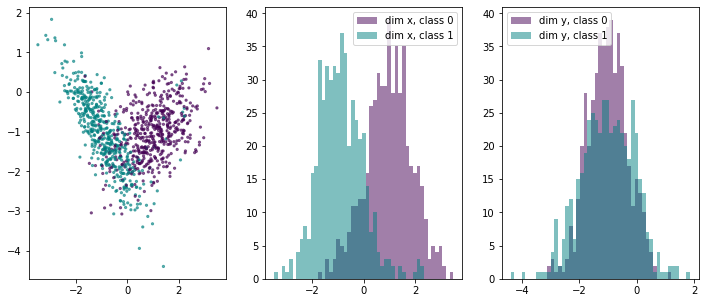

In [3]:
X, y = generateData_twoPills_2D(1000)
plot_dataset_2D(X, y)

In [4]:
X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test = active_split(X, y, labeled_size=0.2)

In [24]:
reload(libactive); from libactive import beam_search2
beam_search2(X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test)

Using sklearn


In [18]:
clf = _

In [16]:
from matplotlib import pyplot as plt

In [22]:
list9range(len(clf.accuracy)

range(0, 301)

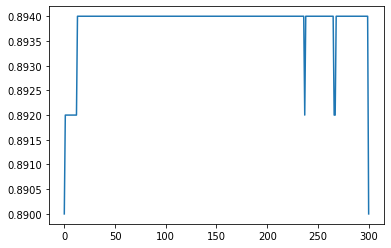

In [23]:
plt.plot(range(len(clf.accuracy)), clf.accuracy)

## Car Beam Search

In [2]:
X, y = car()

In [3]:
X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test = active_split(X, y, labeled_size=0.1)

In [4]:
reload(libactive); from libactive import beam_search2

Using sklearn


In [53]:
clf = beam_search2(X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test, workers=1)

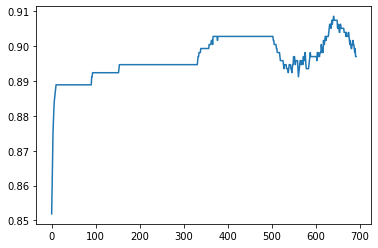

In [54]:
plt.plot(range(len(clf.accuracy)), clf.accuracy)

In [33]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("car", lambda: lru_cache()(car)())
    ],
    "dataset_mutators": {
        "none": (lambda *x: x),
    },
    "methods": [
        ("random", partial(random_batch, n_instances=10)),
        ("uncertainty", partial(batch.uncertainty_batch_sampling, n_instances=10)),
        ("deepfool", partial(adversarial, Attack=partial(DeepFool, verbose=False), n_instances=10)),
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 0.1,
        "n_runs": 1
    }
}

In [34]:
results = librun.run(matrix, force_cache=True)

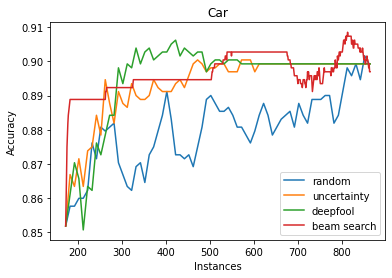

In [66]:
for conf, result in results:
    plt.plot(result['x'], result['accuracy_score'], label=conf.method_name)
plt.plot(range(172, 172+len(clf.accuracy)), clf.accuracy, label="beam search")
plt.xlabel("Instances")
plt.ylabel("Accuracy")
plt.title("Car")
plt.legend();

Checking for mistakes in the metrics collecting version before trying on the german dataset:

In [11]:
import libutil; reload(libutil)

<module 'libutil' from 'C:\\Users\\Zac\\Programming\\python\\research\\libutil.py'>

In [17]:
reload(libactive); from libactive import beam_search2
clf2 = beam_search2(X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test, workers=3)

Using sklearn
2021-01-21 14:54:35,334 - concurrent.futures - ERROR - exception calling callback for <Future at 0x277020104f0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 799, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = sel

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
